* ### 라이브러리 로드

In [63]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as tl
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL.Image import *

* ### 이미지 크기 통일 함수

In [64]:
def ImageProc(path,size,color):
    img = glob.glob(path)
    img = np.random.permutation(img)
    img = [ open(img[i]).convert(color).resize(size) for i in range(len(img))]
    img = [np.array(img[i]) for i in range(len(img))]
    img = np.array(img)
    return img

* ### 고양이 , 강아지 데이터셋 로드

In [65]:
cats = ImageProc('../Detection/Data/cats/*.jpg',(130,130),'RGB')

In [66]:
dogs = ImageProc('../Detection/Data/dogs/*.jpg',(130,130),'RGB')

* ### 데이터셋 병합

In [67]:
X = np.vstack((cats,dogs))

In [68]:
X.shape

(2023, 130, 130, 3)

* ### 이미지 테스트

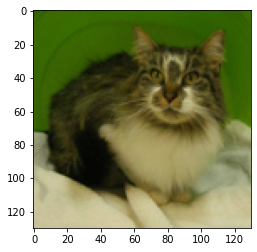

In [69]:
plt.imshow(X[0])

* ### 결과값 생성 ( 0 = cat , 1 = dog )

In [70]:
Y = np.array(np.hstack((np.zeros(len(cats)),np.ones(len(dogs)))))
Y = pd.get_dummies(Y)

In [71]:
X.shape , Y.shape

((2023, 130, 130, 3), (2023, 2))

* ### 모델 구성

In [73]:
model = Sequential()
model.add(tl.Input((130,130,3)))
model.add(tl.Conv2D(3, kernel_size=3,activation='relu'))
model.add(tl.MaxPool2D())
model.add(tl.Conv2D(6, kernel_size=5,activation='relu'))
model.add(tl.MaxPool2D())
model.add(tl.Conv2D(6, kernel_size=5,activation='relu'))
model.add(tl.MaxPool2D())

model.add(tl.Flatten())
model.add(tl.Dense(64,activation='relu'))
model.add(tl.Dense(32,activation='relu'))
model.add(tl.Dense(2,activation='softmax'))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 3)       84        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 6)         906       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1014)             

In [75]:
model.compile('adam','categorical_crossentropy','accuracy')

* ### 모델 학습

In [76]:
model.fit(X,Y,epochs=30,batch_size=8)

Epoch 1/30
253/253 [==============================] - 2s 5ms/step - loss: 0.9233 - accuracy: 0.4967
Epoch 2/30
253/253 [==============================] - 1s 5ms/step - loss: 0.6521 - accuracy: 0.5952
Epoch 3/30
253/253 [==============================] - 1s 5ms/step - loss: 0.6163 - accuracy: 0.6463
Epoch 4/30
253/253 [==============================] - 1s 5ms/step - loss: 0.5412 - accuracy: 0.7061
Epoch 5/30
253/253 [==============================] - 1s 5ms/step - loss: 0.4321 - accuracy: 0.7840
Epoch 6/30
253/253 [==============================] - 1s 5ms/step - loss: 0.3218 - accuracy: 0.8645
Epoch 7/30
253/253 [==============================] - 1s 5ms/step - loss: 0.2151 - accuracy: 0.9104
Epoch 8/30
253/253 [==============================] - 1s 5ms/step - loss: 0.1566 - accuracy: 0.9354
Epoch 9/30
253/253 [==============================] - 1s 5ms/step - loss: 0.1501 - accuracy: 0.9469
Epoch 10/30
253/253 [==============================] - 1s 5ms/step - loss: 0.0785 - accuracy: 0.9766

* ### 테스트 데이터 로드

In [77]:
TestImg = ImageProc('../Detection/Data/test/*.jpg',(130,130),'RGB')

In [78]:
catordog = ['cat','dog']

* ### 예측

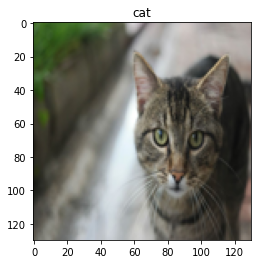

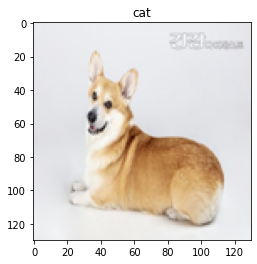

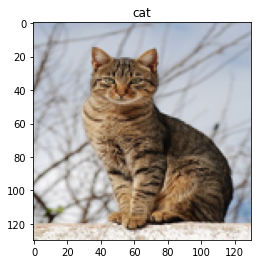

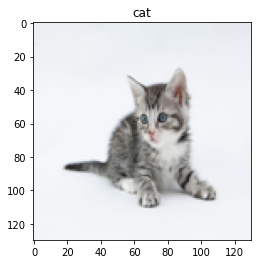

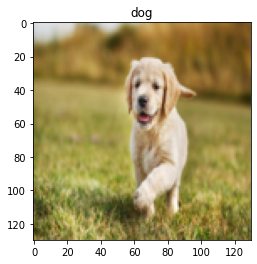

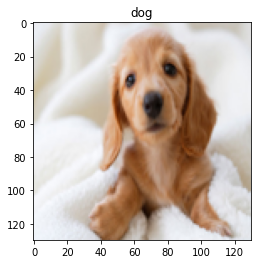

In [80]:
for i in TestImg:
    plt.imshow(i)
    i = i.reshape([1,130,130,3])
    result = catordog[model.predict(i).argmax()]
    plt.title(result)
    plt.show()